# 3.1

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

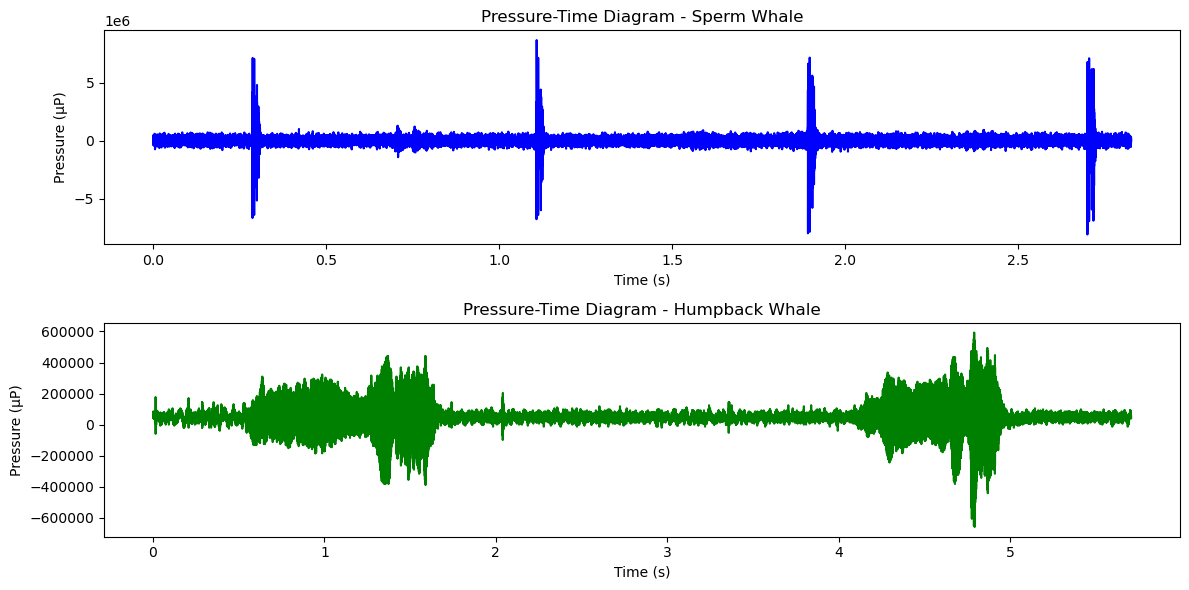

In [15]:
# Load the raw biosignals
sperm_whale_file = '85005006.wav'
humpback_whale_file = '9220100Q.wav'

sperm_whale_signal, sr_sperm = librosa.load(sperm_whale_file, sr=None)
humpback_whale_signal, sr_humpback = librosa.load(humpback_whale_file, sr=None)

GF = 0.16  # Gain factor of the hydrophone
sensitivity = -155  # Sensitivity of the instrument in dB

pressure_sperm = 1.5 * sperm_whale_signal * GF / 10**(sensitivity/20)
pressure_humpback = 1.5 * humpback_whale_signal * GF / 10**(sensitivity/20)

time_sperm = np.arange(len(pressure_sperm)) / sr_sperm
time_humpback = np.arange(len(pressure_humpback)) / sr_humpback

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_sperm, pressure_sperm, color='blue')
plt.title('Pressure-Time Diagram - Sperm Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (µP)')

plt.subplot(2, 1, 2)
plt.plot(time_humpback, pressure_humpback, color='green')
plt.title('Pressure-Time Diagram - Humpback Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (µP)')

plt.tight_layout()
plt.show()

# 3.2

In [4]:
import numpy as np

# Function to calculate RMS pressure
def calculate_rms_pressure(pressure):
    N = len(pressure)
    rms_pressure = np.sqrt(np.sum(pressure**2) / N)
    return rms_pressure

# Function to calculate Sound Pressure Level (SPL)
def calculate_spl(rms_pressure):
    pref = 1e-6  # 1µPa (micro Pascal) reference pressure
    spl = 20 * np.log10(rms_pressure / pref)
    return spl

# RMS pressure and SPL for Sperm whale signal
rms_pressure_sperm = calculate_rms_pressure(pressure_sperm)
spl_sperm = calculate_spl(rms_pressure_sperm)

# RMS pressure and SPL for Humpback whale signal
rms_pressure_humpback = calculate_rms_pressure(pressure_humpback)
spl_humpback = calculate_spl(rms_pressure_humpback)

# Print results
print("Sperm Whale:")
print("RMS Pressure: {:.2f} µPa".format(rms_pressure_sperm))
print("SPL: {:.2f} dB re 1µPa".format(spl_sperm))

print("\nHumpback Whale:")
print("RMS Pressure: {:.2f} µPa".format(rms_pressure_humpback))
print("SPL: {:.2f} dB re 1µPa".format(spl_humpback))


Sperm Whale:
RMS Pressure: 336416.18 µPa
SPL: 230.54 dB re 1µPa

Humpback Whale:
RMS Pressure: 83914.95 µPa
SPL: 218.48 dB re 1µPa


# 3.3

In [5]:
import numpy as np

# the energy in the time domain (p[n])
time_domain_energy = np.sum(np.abs(pressure_sperm)**2)
# Perform FFT on the pressure signal
frequency_domain = np.fft.fft(pressure_sperm)
# the energy in the frequency domain (P[k])
frequency_domain_energy = np.sum(np.abs(frequency_domain)**2)
# Normalize the energy in the frequency domain
frequency_domain_energy /= len(frequency_domain)

# Compare the energy in the time domain with the energy in the frequency domain
print("Energy in the time domain:", time_domain_energy)
print("Energy in the frequency domain:", frequency_domain_energy)

Energy in the time domain: 2.6206093e+16
Energy in the frequency domain: 2.6206095797354132e+16


# 3.4

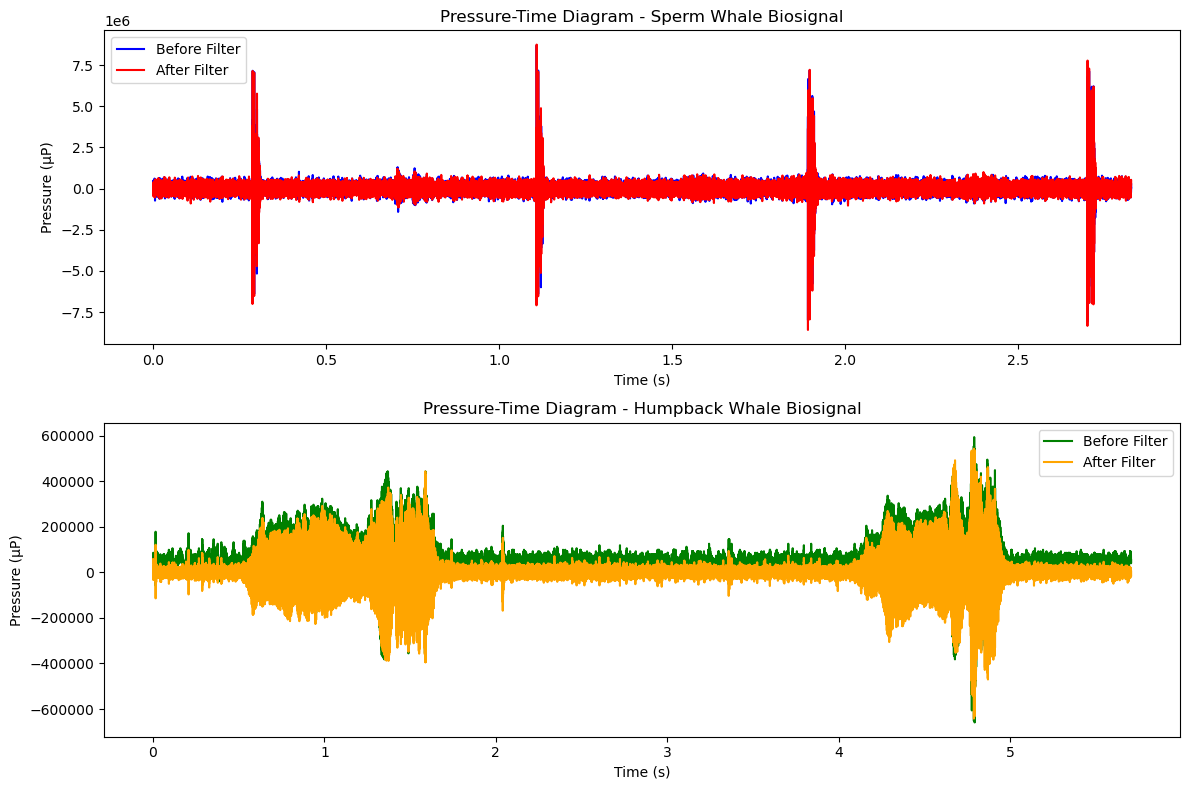

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Function to design and apply a bandpass Butterworth filter
def bandpass_filter(signal, fs, lowcut, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    
    # Design the bandpass Butterworth filter
    b, a = butter(order, low, btype='high')
    
    # Apply the filter to the signal
    filtered_signal = lfilter(b, a, signal)
    
    return filtered_signal

# Define the cutoff frequency for the bandpass filter
lowcut = 200  # Hz

# Apply the bandpass filter to the biosignals
filtered_pressure_sperm = bandpass_filter(pressure_sperm, sr_sperm, lowcut)
filtered_pressure_humpback = bandpass_filter(pressure_humpback, sr_humpback, lowcut)

# Time axis for plotting
time_sperm = np.arange(len(filtered_pressure_sperm)) / sr_sperm
time_humpback = np.arange(len(filtered_pressure_humpback)) / sr_humpback

# Plot Pressure-Time diagrams before and after applying the bandpass filter
plt.figure(figsize=(12, 8))

# Sperm whale biosignal
plt.subplot(2, 1, 1)
plt.plot(time_sperm, pressure_sperm, color='blue', label='Before Filter')
plt.plot(time_sperm, filtered_pressure_sperm, color='red', label='After Filter')
plt.title('Pressure-Time Diagram - Sperm Whale Biosignal')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (µP)')
plt.legend()

# Humpback whale biosignal
plt.subplot(2, 1, 2)
plt.plot(time_humpback, pressure_humpback, color='green', label='Before Filter')
plt.plot(time_humpback, filtered_pressure_humpback, color='orange', label='After Filter')
plt.title('Pressure-Time Diagram - Humpback Whale Biosignal')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (µP)')
plt.legend()

plt.tight_layout()
plt.show()

# 3.5

In [7]:
import librosa
import numpy as np

pile_driving_file = 'Pile driving.wav' # Load the 'Pile driving.wav' file
pile_driving_signal, sr_pile_driving = librosa.load(pile_driving_file, sr=None)
GF_pile_driving = 0.16  # Gain factor of the hydrophone
sensitivity_pile_driving = -125  # Sensitivity of the hydrophone in dB

# Convert raw biosignal to pressure signal
pressure_pile_driving = 3.5 * pile_driving_signal * GF_pile_driving / 10**(sensitivity_pile_driving/20)
# Calculate the RMS pressure of the 'Pile driving.wav' file
rms_pressure_pile_driving = np.sqrt(np.mean(pressure_pile_driving**2))
# Calculate the SPL of the 'Pile driving.wav' file
pref = 1e-6  # 1µPa reference pressure
spl_pile_driving = 20 * np.log10(rms_pressure_pile_driving / pref)
# Check if SPL exceeds the threshold level
threshold_level = 100  # dB
if spl_pile_driving > threshold_level:
    print("The Sound Pressure Level of the 'Pile driving.wav' file ({:.2f} dB) exceeds the threshold level ({} dB) and may affect cetacean behavior.".format(spl_pile_driving, threshold_level))
else:
    print("The Sound Pressure Level (SPL) of the 'Pile driving.wav' file ({:.2f} dB) does not exceed the threshold level ({} dB) and may not significantly affect cetacean behavior.".format(spl_pile_driving, threshold_level))

The Sound Pressure Level of the 'Pile driving.wav' file (235.15 dB) exceeds the threshold level (100 dB) and may affect cetacean behavior.


# 3.6

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Short-Time Energy (STE)
def calculate_ste(signal, window_size):
    num_samples = len(signal)
    ste = np.zeros(num_samples)
    for i in range(num_samples):
        start = max(0, i - window_size // 2)
        end = min(num_samples, i + window_size // 2)
        segment = signal[start:end]
        ste[i] = np.sum(segment**2)
    return ste

# Calculate Short-Time Energy (STE) for both biosignals
window_size = 1000  # Define the window size
ste_sperm = calculate_ste(pressure_sperm, window_size)
ste_humpback = calculate_ste(pressure_humpback, window_size)

# Time axis for plotting
time_sperm = np.arange(len(pressure_sperm)) / sr_sperm
time_humpback = np.arange(len(pressure_humpback)) / sr_humpback

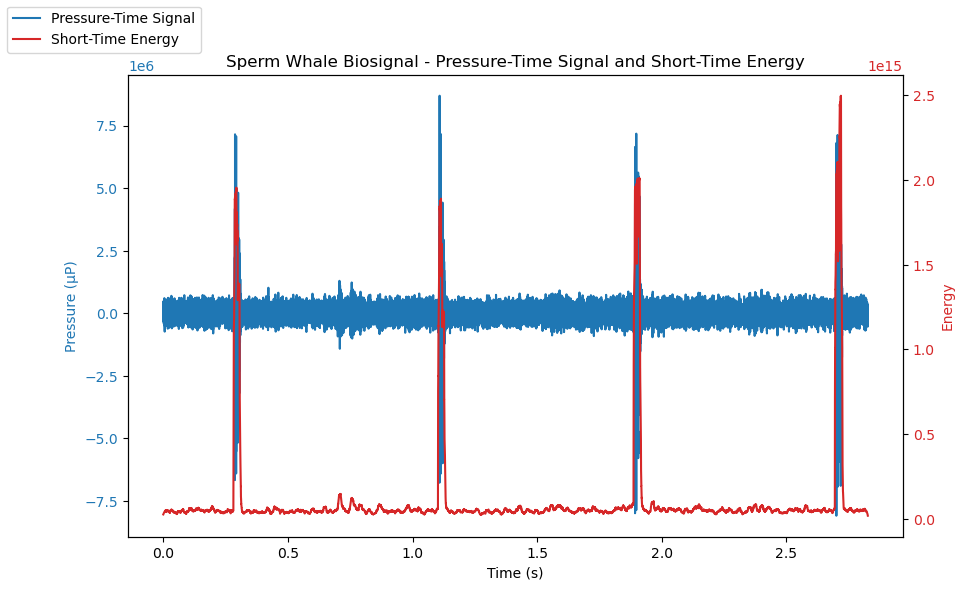

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed pressure_sperm, ste_sperm, and time_sperm

# Plot both Pressure-Time Signal and Short-Time Energy in the same plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Pressure-Time Signal (blue)
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pressure (µP)', color=color)
ax1.plot(time_sperm, pressure_sperm, color=color, label='Pressure-Time Signal')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Short-Time Energy
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Energy', color=color)
ax2.plot(time_sperm, ste_sperm, color=color, label='Short-Time Energy')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.legend(loc="upper left")

plt.title('Sperm Whale Biosignal - Pressure-Time Signal and Short-Time Energy')
plt.show()

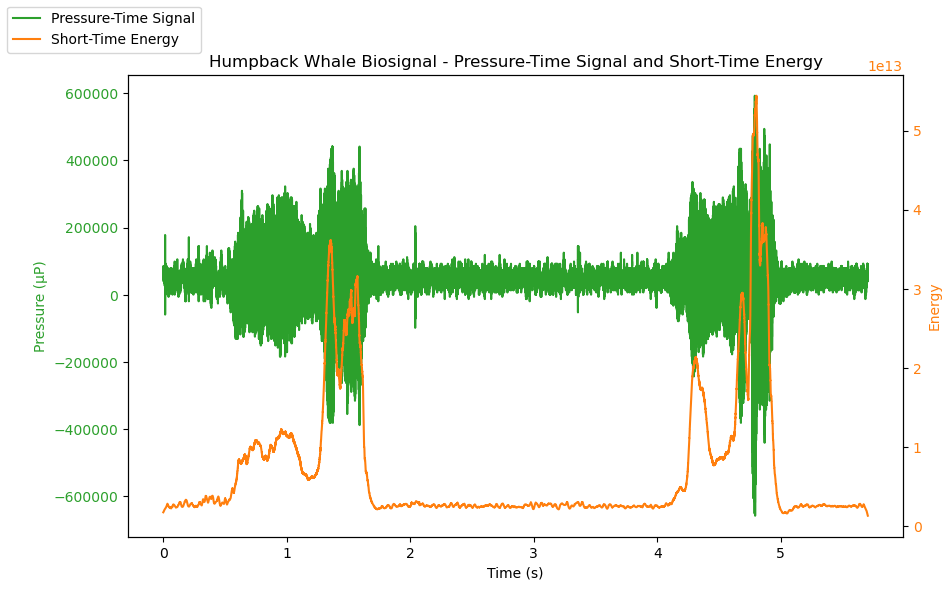

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed pressure_humpback, ste_humpback, and time_humpback

# Plot both Pressure-Time Signal and Short-Time Energy in the same plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Pressure-Time Signal (green)
color = 'tab:green'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pressure (µP)', color=color)
ax1.plot(time_humpback, pressure_humpback, color=color, label='Pressure-Time Signal')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Short-Time Energy
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Energy', color=color)
ax2.plot(time_humpback, ste_humpback, color=color, label='Short-Time Energy')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.legend(loc="upper left")

plt.title('Humpback Whale Biosignal - Pressure-Time Signal and Short-Time Energy')
plt.show()


# 3.7

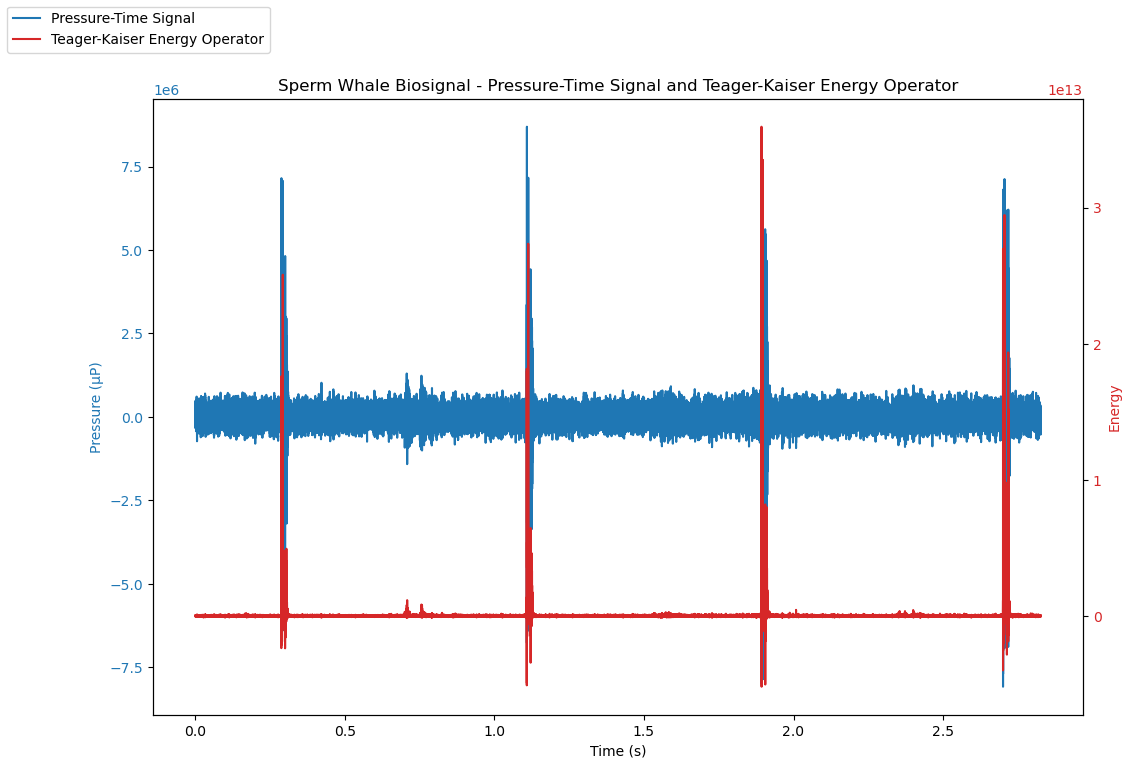

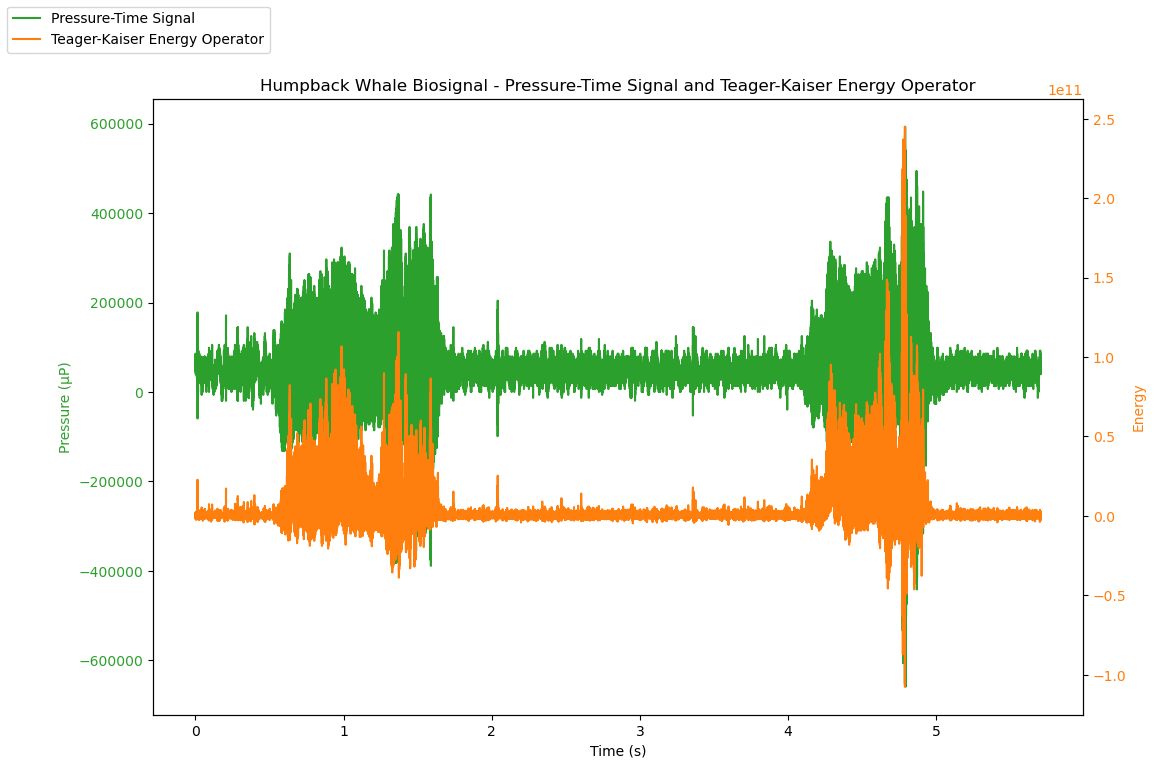

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Teager-Kaiser Energy Operator (TEO)
def calculate_teo(signal):
    teo = np.zeros_like(signal)
    teo[1:-1] = signal[1:-1]**2 - signal[:-2] * signal[2:]
    # Handle signal limits
    teo[0] = signal[0]**2 - signal[0] * signal[1]
    teo[-1] = signal[-1]**2 - signal[-2] * signal[-1]
    return teo

# Calculate TEO for both biosignals
teo_sperm = calculate_teo(pressure_sperm)
teo_humpback = calculate_teo(pressure_humpback)

# Plot the Pressure-Time signals and TEO
# Plot for Sperm Whale Biosignal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Pressure-Time Signal and Teager-Kaiser Energy Operator in the same plot
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pressure (µP)', color=color)
ax1.plot(time_sperm, pressure_sperm, color=color, label='Pressure-Time Signal')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Teager-Kaiser Energy Operator
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Energy', color=color)
ax2.plot(time_sperm, teo_sperm, color=color, label='Teager-Kaiser Energy Operator')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.legend(loc="upper left")

plt.title('Sperm Whale Biosignal - Pressure-Time Signal and Teager-Kaiser Energy Operator')
plt.show()

# Plot for Humpback Whale Biosignal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Pressure-Time Signal and Teager-Kaiser Energy Operator in the same plot
color = 'tab:green'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pressure (µP)', color=color)
ax1.plot(time_humpback, pressure_humpback, color=color, label='Pressure-Time Signal')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Teager-Kaiser Energy Operator
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Energy', color=color)
ax2.plot(time_humpback, teo_humpback, color=color, label='Teager-Kaiser Energy Operator')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.legend(loc="upper left")

plt.title('Humpback Whale Biosignal - Pressure-Time Signal and Teager-Kaiser Energy Operator')
plt.show()

# 3.8

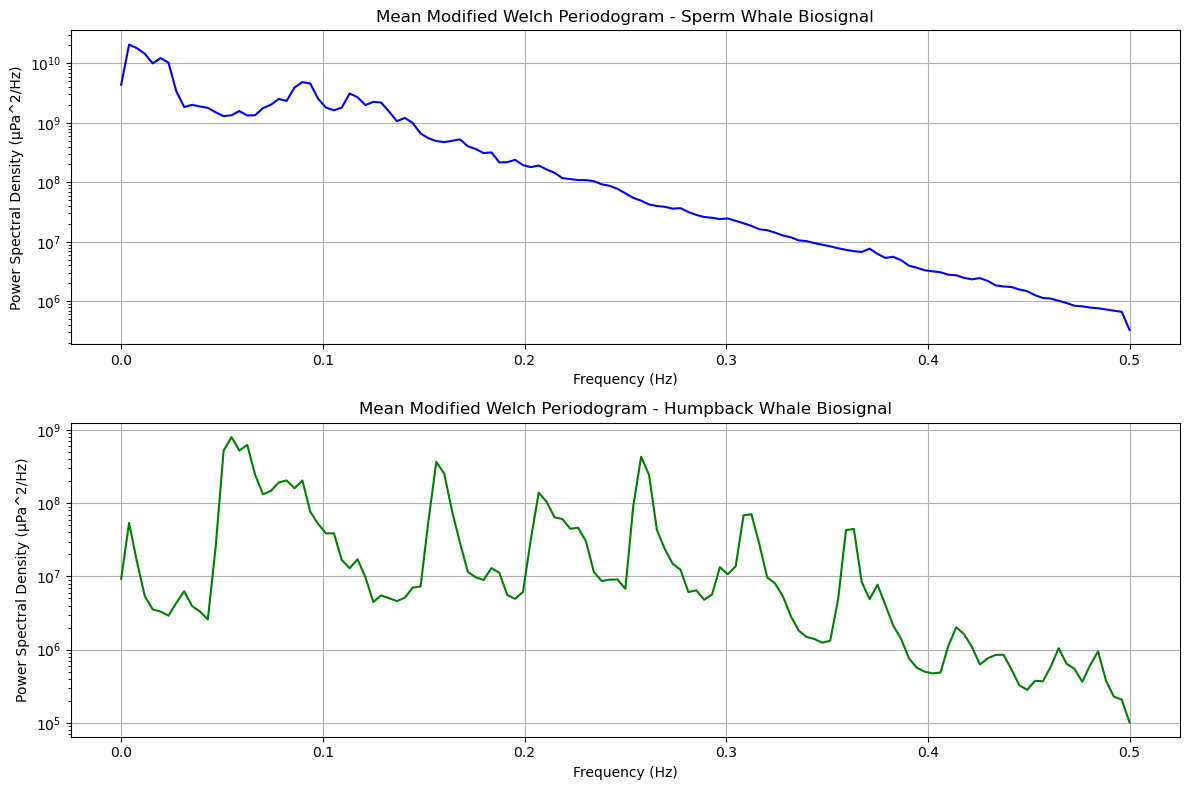

In [12]:
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate mean modified Welch periodogram
def calculate_welch_periodogram(signal, window, nperseg):
    freqs, psd = welch(signal, window=window, nperseg=nperseg, scaling='spectrum')
    return freqs, psd

# Define parameters for Welch periodogram
window = 'hann'  # Window function
nperseg = 256     # Number of data points for each segment

# Calculate Welch periodogram for both biosignals
freqs_sperm, psd_sperm = calculate_welch_periodogram(pressure_sperm, window, nperseg)
freqs_humpback, psd_humpback = calculate_welch_periodogram(pressure_humpback, window, nperseg)

# Plot the Welch periodogram
plt.figure(figsize=(12, 8))

# Sperm Whale Biosignal
plt.subplot(2, 1, 1)
plt.semilogy(freqs_sperm, psd_sperm, color='blue')
plt.title('Mean Modified Welch Periodogram - Sperm Whale Biosignal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µPa^2/Hz)')
plt.grid(True)

# Humpback Whale Biosignal
plt.subplot(2, 1, 2)
plt.semilogy(freqs_humpback, psd_humpback, color='green')
plt.title('Mean Modified Welch Periodogram - Humpback Whale Biosignal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µPa^2/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3.9

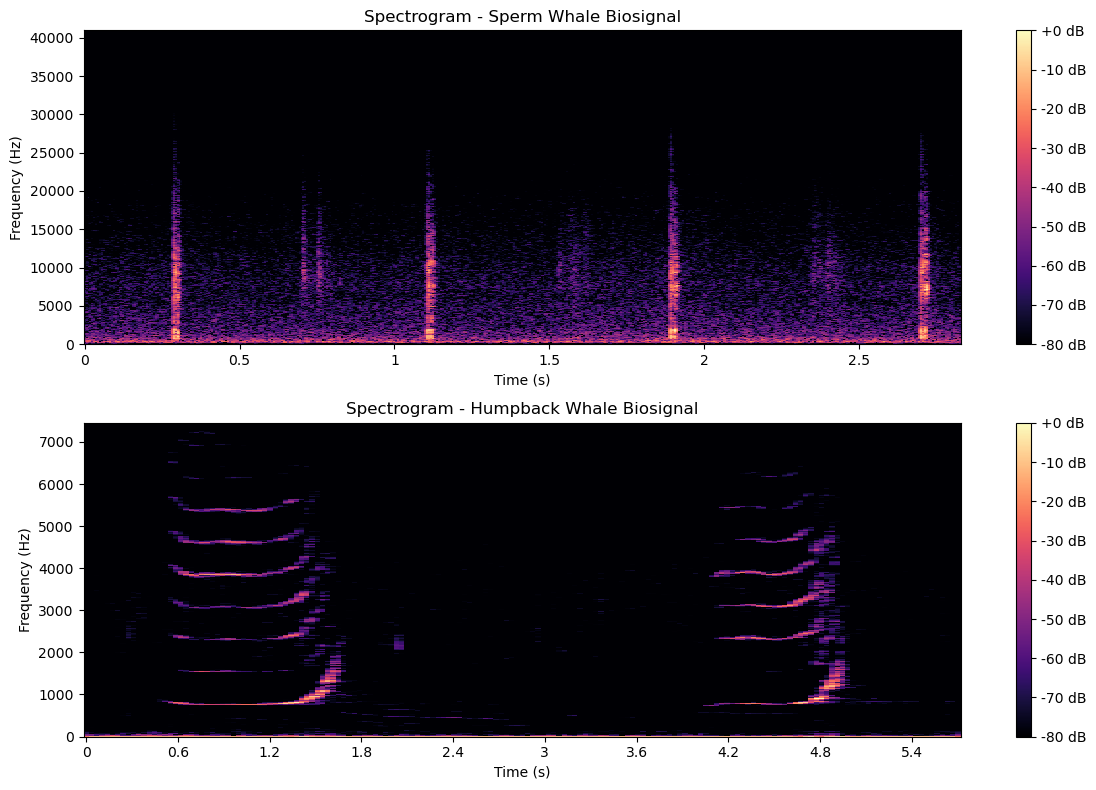

In [13]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to calculate spectrogram
def calculate_spectrogram(signal, sr):
    stft = librosa.stft(signal)
    spectrogram = np.abs(stft)**2
    return spectrogram

# Calculate spectrogram for both biosignals
spectrogram_sperm = calculate_spectrogram(pressure_sperm, sr_sperm)
spectrogram_humpback = calculate_spectrogram(pressure_humpback, sr_humpback)

# Convert spectrogram to dB scale
spectrogram_db_sperm = librosa.amplitude_to_db(spectrogram_sperm, ref=np.max)
spectrogram_db_humpback = librosa.amplitude_to_db(spectrogram_humpback, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 8))

# Sperm Whale Biosignal
plt.subplot(2, 1, 1)
librosa.display.specshow(spectrogram_db_sperm, sr=sr_sperm, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Sperm Whale Biosignal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Humpback Whale Biosignal
plt.subplot(2, 1, 2)
librosa.display.specshow(spectrogram_db_humpback, sr=sr_humpback, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Humpback Whale Biosignal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

# 3.10

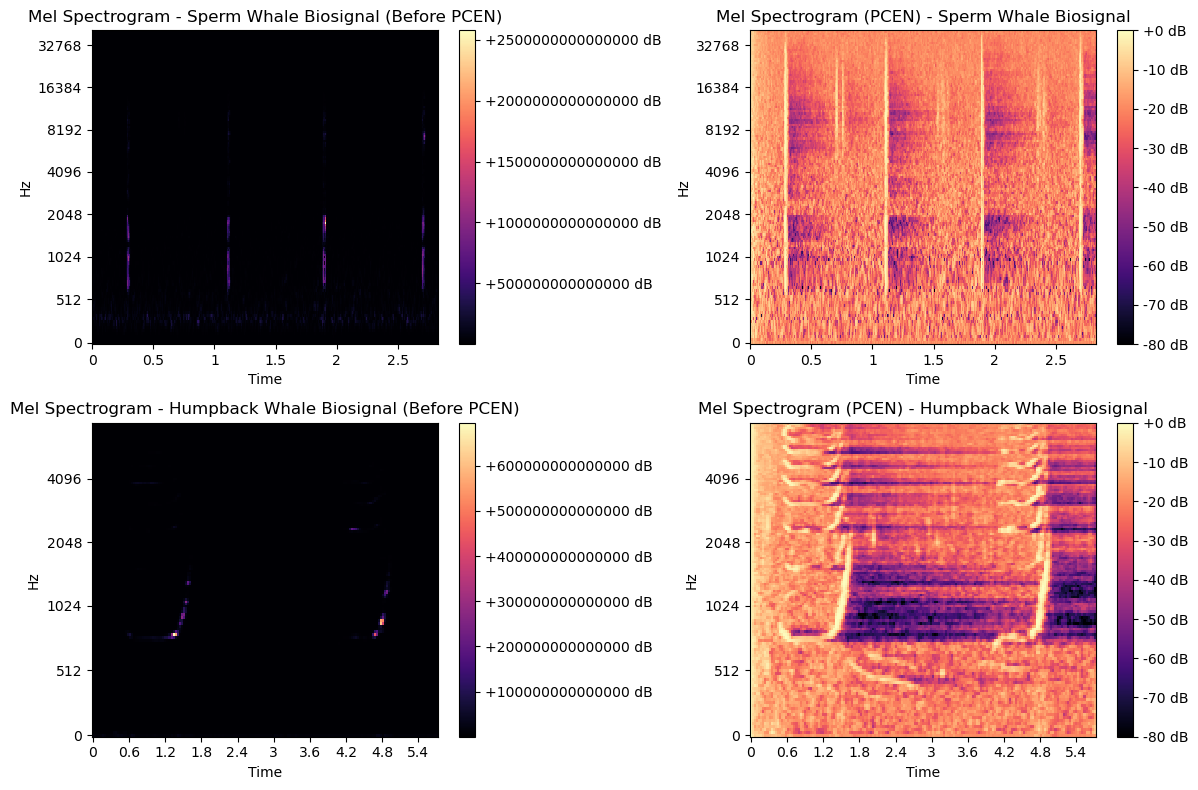

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to calculate mel spectrogram
def calculate_mel_spectrogram(signal, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    return mel_spectrogram

# Function to apply PCEN
def apply_pcen(mel_spectrogram):
    pcen_spectrogram = librosa.pcen(mel_spectrogram)
    return pcen_spectrogram

# Calculate mel spectrogram for both biosignals
mel_spectrogram_sperm = calculate_mel_spectrogram(pressure_sperm, sr=sr_sperm)
mel_spectrogram_humpback = calculate_mel_spectrogram(pressure_humpback, sr=sr_humpback)

# Apply PCEN to mel spectrograms
pcen_spectrogram_sperm = apply_pcen(mel_spectrogram_sperm)
pcen_spectrogram_humpback = apply_pcen(mel_spectrogram_humpback)

# Convert spectrograms to dB scale
pcen_spectrogram_db_sperm = librosa.amplitude_to_db(pcen_spectrogram_sperm, ref=np.max)
pcen_spectrogram_db_humpback = librosa.amplitude_to_db(pcen_spectrogram_humpback, ref=np.max)

# Plot the mel spectrograms before and after applying PCEN
plt.figure(figsize=(12, 8))

# Sperm Whale Biosignal
plt.subplot(2, 2, 1)
librosa.display.specshow(mel_spectrogram_sperm, sr=sr_sperm, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram - Sperm Whale Biosignal (Before PCEN)')

plt.subplot(2, 2, 2)
librosa.display.specshow(pcen_spectrogram_db_sperm, sr=sr_sperm, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (PCEN) - Sperm Whale Biosignal')

# Humpback Whale Biosignal
plt.subplot(2, 2, 3)
librosa.display.specshow(mel_spectrogram_humpback, sr=sr_humpback, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram - Humpback Whale Biosignal (Before PCEN)')

plt.subplot(2, 2, 4)
librosa.display.specshow(pcen_spectrogram_db_humpback, sr=sr_humpback, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (PCEN) - Humpback Whale Biosignal')
 
plt.tight_layout()
plt.show()